<a href="https://colab.research.google.com/github/radhika3131/Deep_Learning_with_Python/blob/main/ch_03_Getting_started_with_neural_network_Classification_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Regression glossary

classification and regression involves mnay specialized terms .

1. Sample or input- one data point that goes into your model
2. Prediction or output - what comes out of you model .
3. Target - The truth. what your model should ideally have predicted , according to an external source of data.
4. classes - A set of possible labels to chose from in a classification problem .For example , when  classifying cat and dog pictures , "dog" and "cat" are the two classes.
5. Label - A specific instance of class annotation in aclassification problem . For instance , if picture # 1234 is annotated as containing the class "dog" the "dog" is label of picture #1234
6. Griund-Truth or annotations - All targets for a dataset, typically collected by humans.
7. Binary Classification - A classification task where each input sample should be categorized into two exclusive categories.
8. Multilabel Classification - A classification task where each input samples can be asssigned multiple labels , For instance , a given image may contain both a cat and dog and should be annnotated both with the "cat" label and the "dog" label .**The number of labels per image is usually varible**.
9. Multiclass classification - A classification task where each input sample should be categorized into more than two categories:for instance , classifying handwritten digit.
10. Scalar Regression - A task where the target is a  continuous scalar value .Predicting house price is agood example: the different target price from continuous space.
11. Vector regression - a task where the target is a set of continuous values .for example , a continuous vector. if you are doing regression against  multiple values(such as coordinates of bounding box in a images.
12. Mini- batch or Batch - a small set of samples(typically betwenn 8 and 128)
that are processed simultaneously by the model . The number of samples is often a power of 2 , to facilitate the memory allocation of GPU . when training a mini-batch is used to ompute a single gradient descent update applied to the weights of the model


#Classifying movie reviews: a binary classification

you will learn to classify movie reviews as positive or negative ,based on the content of the movie

The IMDB dataset
 you will work work with the IMDB dataset : a set of 50,000 highly polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing , each set consisting of 50% negative and 50% positive reviews

Loading the dataset

In [12]:
from tensorflow.keras.datasets import imdb
(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words = 10000)
# the argument num_words = 100000 means you will only keep the top 10,000 most frequently occuring words in the training data, this allow us to work work with manageble size

17464789/17464789 [==============================] - 0s 0us/step


The variable train__data and test_data are list of reviews ;each review is a list of word indices.train_labels and test_labels are list of 0's and 1's , 0 stand for negatibe and 1 stand for positive

In [13]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [14]:
train_labels[0]

1

In [15]:
# as we are restricting ourselves on the top 10,000 nost frequent words , no word index will exceed 10,000
max([max(sequence) for sequence in train_data]) 

9999

Decoding reviews back to english word(text)

In [16]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index
reverse_word_index = dict(
    [(value, key) for (key , value ) in word_index.items()]# reverse it map integer indexes to a word 
)

decode_review = " ".join(
    [reverse_word_index.get(i - 3 , "?") for i in train_data[0]]
)
# decode the review ,Note that the indices are offset by 3 becz 0 and 1 and 2 are reserved indices for "padding" , "start of sequence " and "unknown"

1641221/1641221 [==============================] - 0s 0us/step


#Preparing the data

you can directly feed the list into the neural network. they all have different length , but neural network expects to process contiguous batches of data, you have to turn your list into tensors

1. pad your list so that they all have the same length , turn them into a integer tensor of shaoe(samples, max_length )
2. Multi-hot encode your lists to turn them into vector of 0s and 1s

Encoding the integer sequence via multi-hot encoding

In [17]:
import numpy as np
def vectorize_sequences(sequences , dimension = 10000):
  results = np.zeros((len(sequences) , dimension)) # create an all -zeros matrix of shape(lrn(sequences), dimension)
  for i , sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1  # sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) # vectorized train data
x_test = vectorize_sequences(test_data) # vectorized test data

In [18]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
# you should also vectorized you labels
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

# now data is ready to fed into neural network

Building your model

A type of model that performs on such type of problem is a simple stack of densly connected(Dense) layer with relu activation function.
There are two key architecture decisions to be made about such a stack of Dense layers.
1. how many layers to chose
2. How many units to chose for each layer

Model definition

In [20]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1 , activation = "sigmoid")
])

Compiling the model

In [21]:
model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

# Validating your approach
its a standard practice to monitor the accuracy of the model during training .

Setting aside a validating set

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 77ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 8/20
30

call to model.fit() returns a history object , This object has a member history, which is dictionary containing data about every things happen during training.

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

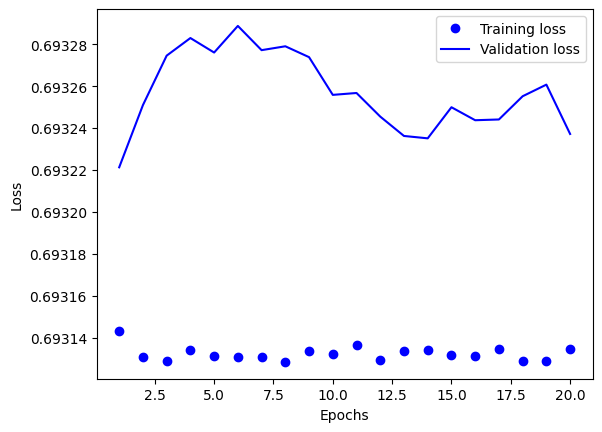

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs , loss_values , "bo" , label = "Training loss") # " bo" is for blue dot
plt.plot(epochs , val_loss_values , "b" , label = "Validation loss") # b is for "solid blue line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plotting the training and validation accuracy

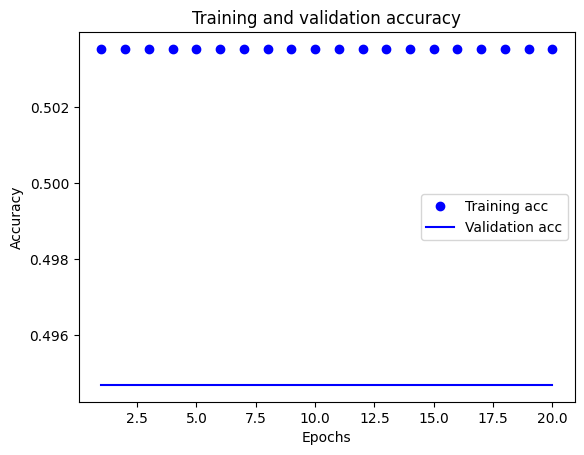

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs , acc , "bo" , label = "Training acc") # " bo" is for blue dot
plt.plot(epochs , val_acc , "b" , label = "Validation acc") # b is for "solid blue line"
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


As you can see , the training loss decreases with evert epoch , the training accuracy increases with every epochs. But this is not the case for the validaton loss and accuracy : they seem to peak at the fourth epoch .

Basically a model that performs better on trainimg data  is not neccesarily a model that will do better on the data it has never seen before . In precise term what you are seeing is **Overfitting**.,after the fouth epoch , you are overoptimizing on the training data , and you end up learning representation that are specific to the trainig data and do'nt generate to data outside of the trainin set.

Lets train a new model from scrach for four epochs and then evaluate it on the test data

In [27]:
model = keras.Sequential([
    layers.Dense(16 , activation = "relu"),
    layers.Dense(16 , activation = "relu"),
    layers.Dense(1 , activation = "sigmoid")

])

In [28]:
model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [29]:
model.fit(x_train , y_train , epochs = 4 , batch_size = 512 
)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.6932 - accuracy: 0.4939
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.6932 - accuracy: 0.4973
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.6932 - accuracy: 0.4925
Epoch 4/4
49/49 [==============================] - 2s 40ms/step - loss: 0.6932 - accuracy: 0.4956


In [30]:
result = model.evaluate(x_test , y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5000


In [31]:
result

[0.6931476593017578, 0.5]

Using a trained model to generate prediction on new data

In [32]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.49861678],
       [0.49971718],
       [0.49971718],
       ...,
       [0.49971718],
       [0.49971718],
       [0.49971718]], dtype=float32)

# Classifying newswires : A multiclass classification example

In this section , we will build a model to classify Reuters newswires into 46 mutually exclusive topics. Becz we have many classes , this problem is an instance of the multiclass classification , and because each data point should be classified inbto only one category , the problem is more specifically an instance of single label multiclass classification 

Reuters dataset , a set of short newswires and their topics

Loading the Reuters dataset

In [33]:
from tensorflow.keras.datasets import reuters
(train_data , train_labels) , (test_data , test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [34]:
len(train_data)

8982

In [35]:
len(test_data)

2246

In [36]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

decode newswires back to text

In [37]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index
reverse_word_index = dict(
    [(value, key) for (key , value ) in word_index.items()]# reverse it map integer indexes to a word 
)

decode_review = " ".join(
    [reverse_word_index.get(i - 3 , "?") for i in train_data[0]]
)
# decode the review ,Note that the indices are offset by 3 becz 0 and 1 and 2 are reserved indices for "padding" , "start of sequence " and "unknown"

#Preparing the data

encoding the input data

In [38]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

To vectorize the labels , there are two possibilities : you can cast the label list as an integer tensor , or you can use one - hot encoding , In this case , one hot encoding of the labeks consists of embedding each labels as an all zero vector with a 1 in the place of the label index

Encoding the labels

In [39]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels) # vectorizing training labels
y_test = to_one_hot(test_labels)   # vectorizing testing labels

# Building your model

The number of output classes are 46 , The dimensionality of the output space is much larger

In a stack of Dense layer like those we have been using , each layer can only access information present in the output of the previous layer . if one layer drops some information relavet to classification problem , this information can never be recovered by the later layers , each layer can potentially become an infromation bottleneck  .In the previous example we have have used 16 dumensional intermediate layers , but a 16 dimensional space may be too limited tolearn to separate 46 different classes, such small layer may act as information bottleneck , permanantly dropping relavent infomation.
thats why we will be using 64 units

Model definition

In [40]:
model = keras.Sequential([
    layers.Dense(64 , activation = "relu"),
    layers.Dense(64 , activation = "relu"),
    layers.Dense(46 , activation = "softmax")

])

There are two things you should note about this architecture 

1. we end the model witha dense layer of size 46 , this means for each input sample , the network will output a 46 dimensional vector . Eeach entery in this vector will encode a different output class.

2. the last layer uses a softmax activation . It means model will output a probability distribution over the 46 different classes , for every input sample , the model will produce a 46 dimensional output vector , where output[i] is the probabilty f sample belongs to calss i.

loss function to use in this case is categorical_crossentropy. it measures the distance between two probabilti distribution . here , between the probability distribution output by the model and the true distribution of the labels . By minimizing the distance between these two distribution you can train the model to produce output closer to true labels

Compilimg the model

In [41]:
model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

#Validating your approach

setting aside a validation set

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Training the model

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 3.8118 - accuracy: 0.1134 - val_loss: 3.7978 - val_accuracy: 0.2220
Epoch 2/20
16/16 [==============================] - 1s 92ms/step - loss: 3.7880 - accuracy: 0.2487 - val_loss: 3.7769 - val_accuracy: 0.3530
Epoch 3/20
16/16 [==============================] - 1s 94ms/step - loss: 3.7675 - accuracy: 0.3514 - val_loss: 3.7569 - val_accuracy: 0.3530
Epoch 4/20
16/16 [==============================] - 1s 66ms/step - loss: 3.7476 - accuracy: 0.3330 - val_loss: 3.7371 - val_accuracy: 0.3530
Epoch 5/20
16/16 [==============================] - 1s 57ms/step - loss: 3.7278 - accuracy: 0.3514 - val_loss: 3.7175 - val_accuracy: 0.3530
Epoch 6/20
16/16 [==============================] - 1s 56ms/step - loss: 3.7083 - accuracy: 0.3514 - val_loss: 3.6981 - val_accuracy: 0.3530
Epoch 7/20
16/16 [==============================] - 1s 55ms/step - loss: 3.6889 - accuracy: 0.3514 - val_loss: 3.6789 - val_accuracy: 0.3530
Epoch 8/20
16

plotting the training and validation loss

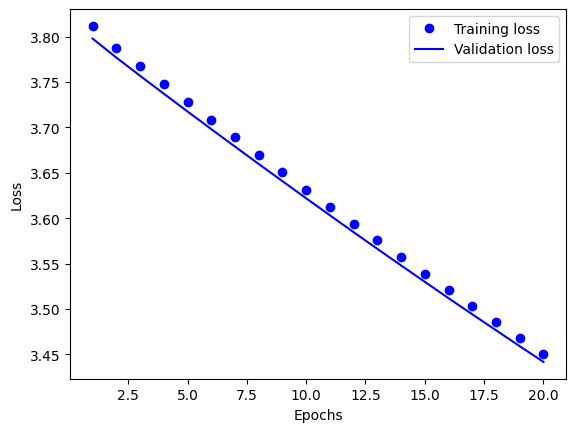

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs , loss_values , "bo" , label = "Training loss") # " bo" is for blue dot
plt.plot(epochs , val_loss_values , "b" , label = "Validation loss") # b is for "solid blue line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plotting the training and validation accuracy

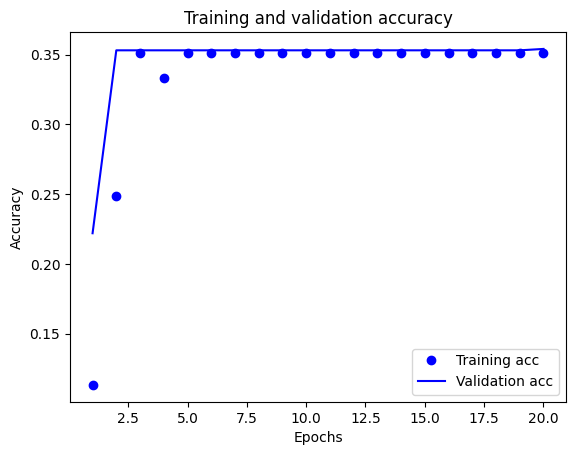

In [45]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs , acc , "bo" , label = "Training acc") # " bo" is for blue dot
plt.plot(epochs , val_acc , "b" , label = "Validation acc") # b is for "solid blue line"
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the model from scratch

In [46]:
model = keras.Sequential([
    layers.Dense(64 , activation = "relu"),
    layers.Dense(64 , activation = "relu"),
    layers.Dense(46 , activation = "softmax")

])

model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [47]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 2s 79ms/step - loss: 3.8105 - accuracy: 0.2948 - val_loss: 3.7921 - val_accuracy: 0.3615
Epoch 2/20
18/18 [==============================] - 1s 63ms/step - loss: 3.7555 - accuracy: 0.3517 - val_loss: 3.7056 - val_accuracy: 0.3620
Epoch 3/20
18/18 [==============================] - 1s 57ms/step - loss: 3.6476 - accuracy: 0.3517 - val_loss: 3.5694 - val_accuracy: 0.3620
Epoch 4/20
18/18 [==============================] - 1s 56ms/step - loss: 3.4881 - accuracy: 0.3517 - val_loss: 3.3847 - val_accuracy: 0.3620
Epoch 5/20
18/18 [==============================] - 2s 90ms/step - loss: 3.2822 - accuracy: 0.3517 - val_loss: 3.1583 - val_accuracy: 0.3620
Epoch 6/20
18/18 [==============================] - 2s 98ms/step - loss: 3.0428 - accuracy: 0.3517 - val_loss: 2.9109 - val_accuracy: 0.3620
Epoch 7/20
18/18 [==============================] - 1s 59ms/step - loss: 2.8000 - accuracy: 0.3517 - val_loss: 2.6838 - val_accuracy: 0.3620
Epoch 8/20
18

In [48]:
results = model.evaluate(x_test , y_test)

71/71 [==============================] - 0s 6ms/step - loss: 2.4146 - accuracy: 0.3620


In [49]:
results

[2.4146335124969482, 0.36197686195373535]

In [50]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [51]:
predictions[0].shape

(46,)

In [52]:
np.argmax(predictions[0]) # class with highest probability

3

# Predicting house prices: a regression example

Regression : predicting a continuous value.

#The Boston housing price dataset
we will  attempt to predict median price of homes in given Boston suburb in the mid -1970s
This dataset has few data points ; only 506 ; split 404 training sample and 102 test samples . And each features in the input data has different scale .For instance , some value uses are proportions , which take value between 0 and 1 , others take values between 1 and 12 , others netween 0 and 100 

Loading the Boston housing dataset

In [53]:
from tensorflow.keras.datasets import boston_housing
(train_data , train_targets) , (test_data , test_targets) = boston_housing.load_data()

In [54]:
train_data.shape # with 13 numerical features

(404, 13)

In [55]:
test_data.shape

(102, 13)

In [56]:
# the targets are the median values of the owner occupied homes, in the thousand of dolars
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

#Preparing the data

It would be problematic to feed into aneural network values that all take widely different ranges .The model might be able to automatically adapt the hetrogenious data , but it would definatky make learning difficult , for dealing with such data is to do feature normalization : for each feature in the input data , we subtract the mean of the feature and divide the standard deviation , so that the feature is centered around 0 and has a unit standard deviation

Normalizing the data

In [57]:
mean = train_data.mean(axis = 0)
train_data -= mean 
std = train_data.std(axis =0)
train_data /= std
test_data -= mean
test_data /= std
# Note the quantities used for normalizing the test data are computed using training data

#Building the model

As so few sample are available so we will use a very small model of two intermediate layers, each with 64 units .In general **the less training data we have the worse overfitting will be** , and using a small model is on way to imigate overfitting

Model definition

In [70]:
def build_model():
  model = keras.Sequential([ # becz we need to instantiate the same model multiple times , we use a function to construct it
      layers.Dense(64 , activation = "relu"),
      layers.Dense(64, activation = "relu"),
      layers.Dense(1)
  ])
  model.compile(
    optimizer = "rmsprop",
    loss = "mse",
    metrics = ["mae"]
)
  return model 

The model ends with a single unit and no activation (it will be linear layer) . This is a typical setup for scalar regression (A regression where you are trying to predict a single continuous value).


Applying an activation function would  constrain the range the output can atke ; for instance ; if you applied a sigmoid activation function to the last layer , the model could only learn to predict values between 0 and 1 .Here , the last layer is purely linear , the model is free to learn to predict values in any range.

# Validating your approach Using K - fold validation

To evaluate our model while we keep adjusting its parameters(such as numbers of epochs used for training), we could split the data into a trainimg set and validation set , but becz we have so few data points , the validation set would end up being very small . As consequences , the validation scores might change a lot depending on which data points we chose for validation and which we chose for training ; the validation scores might have high **varience** with regard to the validation split . This would prevent us from reliable evaluating our model.


the best practise is to use k-fold crossvalidation

it consist of splitting the available data into k partitions(typically k = 4 or 5) , and training each one on k -1 partition while evaluating on the remaining partition . The validation scorefor the model used is then the average of the k validation scores obtained

k - fold validation


In [72]:
import numpy as np
import tensorflow as tf
tf.keras.utils.custom_object_scope

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f" Processing fold #{i} ")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # prepares the validation data from partition 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(   # prepares the training data : data from all other partitions
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()    # build the keras model 
    model.fit(partial_train_data, partial_train_targets, # train the model 
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  # evaluate the model on validation data
    all_scores.append(val_mae)  

 Processing fold #0 
 Processing fold #1 
 Processing fold #2 
 Processing fold #3 


In [73]:
all_scores

[2.1458842754364014, 2.4742960929870605, 2.594013214111328, 2.524805784225464]

In [74]:
np.mean(all_scores)

2.4347498416900635

Lets try training the model a bit longer : 500 epochs . To keep a record of how well the model does at each epochs , we will modify the training loop to save the per-epoch validation score log for each fold

Saving the validation logs at each fold

In [76]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Building the history of successive mean k -fold validation scores

In [77]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs) 
]

plotting validation score

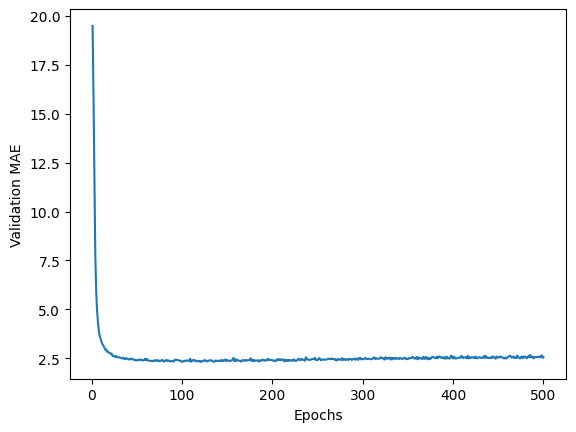

In [78]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

plotting validation score , excluding the first 10 data points

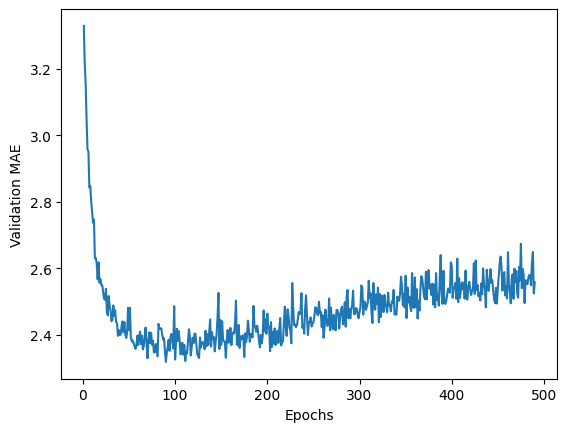

In [79]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Training the final model

In [80]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 13.8553 - mae: 2.5396


In [81]:
test_mae_score

2.5395684242248535

Generating prediction on new data

In [82]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


In [84]:
predictions[0]

array([8.202162], dtype=float32)